In [147]:
%load_ext autoreload
%autoreload 2

import sys 
import pandas as pd

sys.path.append("..")

import analizer as an


# pd.set_option('max_columns', 200)

# Data import
# df_origin = pd.read_excel('report.xls')
df_origin = pd.read_excel('./Igor/report_full.xlsx')

df_full = an.prepare_columns(df_origin)
df_orders = an.extend_with_grid_details(df_full)

df_orders = df_orders.sort_values(by='OPEN_DT', ascending=False)

df_grids = an.get_grids(df_orders)
df_sum = an.get_summary(df_full=df_full,
                        df_orders=df_orders,
                        df_grids=df_grids)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/sournk/dev/rf-history/research/../analizer/__init__.py:210: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_res.loc[(df_res['SIDE'] == TYPE_FOR_BALANCE) & (df_res['PROFIT'] < 0), ['DK_WITHDRAWAL']] = df_res['PROFIT']


# 01. Account Summary

Период: 2023-02-26 - 2023-06-20
Календарных дней: 114
Торговых дней: 87

Баланс: $18,229.12
Пополнений: $36,601.21
Снятий: $-31,217.00
Прочие движения: $274.15

Собственных средств: $5,384.21

Прибыль: $12,570.76
Средняя прибыль в календарный день: $110.27
Средняя прибыль в торговый день: $144.49

ROA: 69.0%
ROA календарных дней: 165

ROI: 233.5%
ROI календарных дней: 49

Ордеров: 5,621
Прибыльных: 3,906
Win Rate: 69.5%
Прибыль ордера: AVG=$2.24 | MAX=$2,460.70
Убыток ордера: MAX=$-525.01

Cеток однонаправленных: 2,551
Лот на $1000 депозита: MIN=0.0066 | AVG=0.0258 | MAX=0.6407 | LAST=0.0208
Ордеров в сетке: AVG=2.2 | MAX=17
Прибыль сетки: AVG=$5.08 | MAX=$1,860.38
Просадка сетки: AVG=-$18.54 | MAX=-$7,785.40
Просадка сетки от депозита: AVG=0.2% | MAX=48.9%


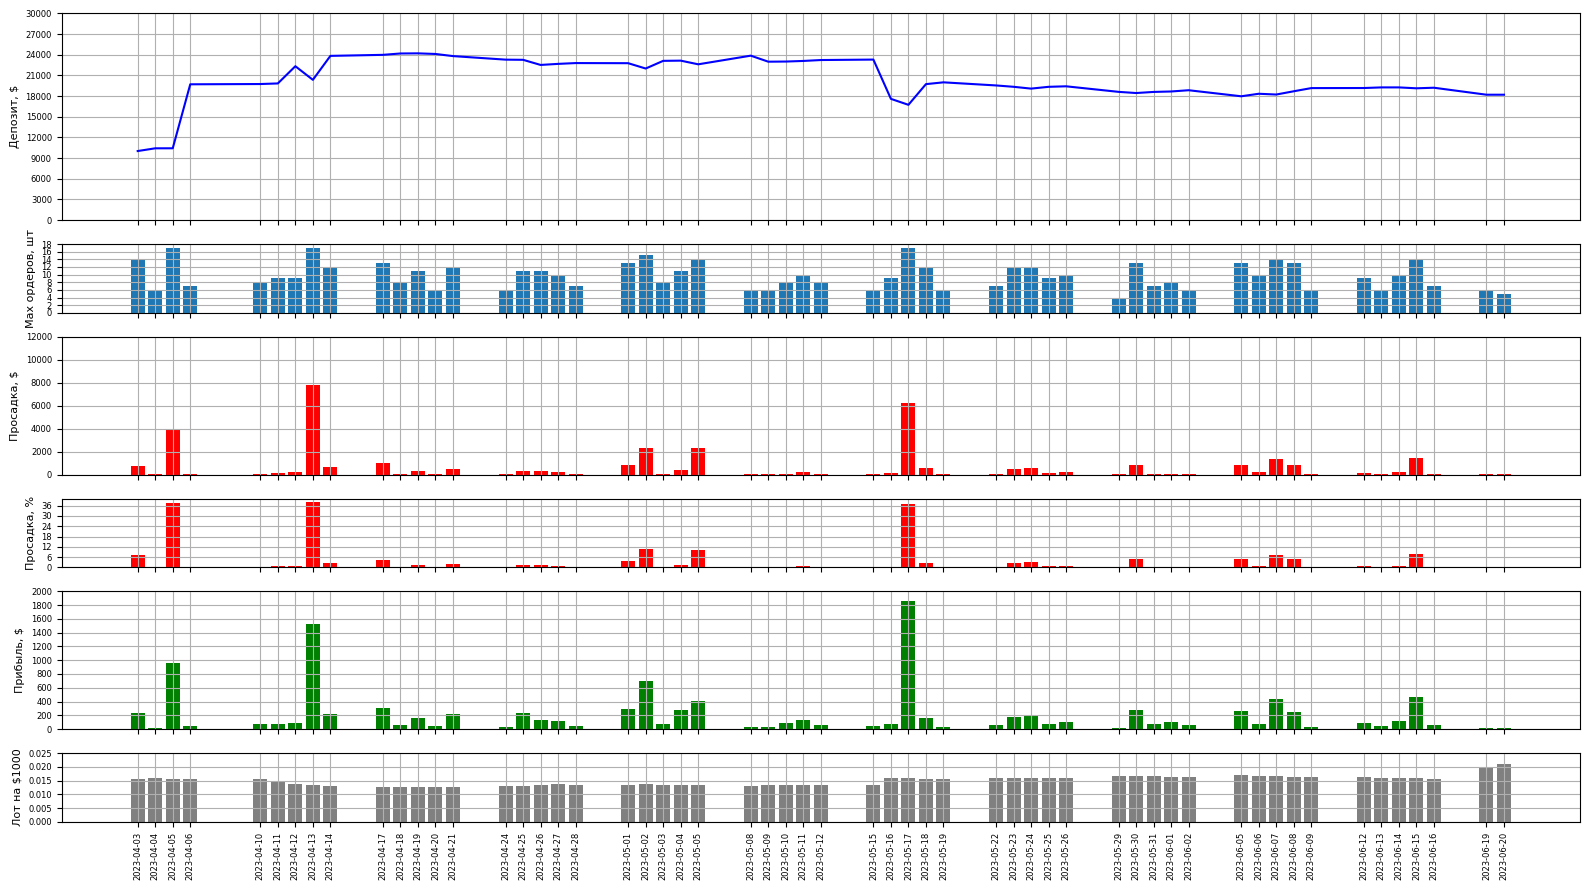

In [148]:
print(f"Период: {df_sum.iloc[0]['START_DATE']} - {df_sum.iloc[0]['FINISH_DATE']}")
print(f"Календарных дней: {df_sum.iloc[0]['CAL_DAYS']:,.0f}")
print(f"Торговых дней: {df_sum.iloc[0]['DAYS']:,.0f}")
print('')

print(f"Баланс: ${df_sum.iloc[0]['BALANCE']:,.2f}")
print(f"Пополнений: ${df_sum.iloc[0]['DK_DEPOSIT']:,.2f}") 
print(f"Снятий: ${df_sum.iloc[0]['DK_WITHDRAWAL']:,.2f}")
print(f"Прочие движения: ${df_sum.iloc[0]['DK_MISC_TRANS']:,.2f}")
print('')

print(f"Собственных средств: ${df_sum.iloc[0]['OWN_FUNDS']:,.2f}")
print('')

print(f"Прибыль: ${df_sum.iloc[0]['PROFIT']:,.2f}")
print(f"Средняя прибыль в календарный день: ${df_sum.iloc[0]['PROFIT_PER_CAL_DAY']:,.2f}")
print(f"Средняя прибыль в торговый день: ${df_sum.iloc[0]['PROFIT_PER_DAY']:,.2f}")
print('')

print(f"ROA: {df_sum.iloc[0]['ROA']*100:,.1f}%")
print(f"ROA календарных дней: {df_sum.iloc[0]['ROA_DAYS']:,.0f}")
print('')

print(f"ROI: {df_sum.iloc[0]['ROI']*100:,.1f}%")
print(f"ROI календарных дней: {df_sum.iloc[0]['ROI_DAYS']:,.0f}")
print('')

print(f"Ордеров: {df_sum.iloc[0]['ORDER_ID']:,.0f}")
print(f"Прибыльных: {df_sum.iloc[0]['HAS_ORDER_PROFIT']:,.0f}")
print(f"Win Rate: {df_sum.iloc[0]['WIN_RATE']*100:,.1f}%")
print(f"Прибыль ордера: AVG=${df_sum.iloc[0]['AVG_ORDER_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_ORDER_PROFIT']:,.2f}")
print(f"Убыток ордера: MAX=${df_sum.iloc[0]['MAX_ORDER_LOSS']:,.2f}")
print('')

print(f"Cеток однонаправленных: {df_sum.iloc[0]['GRID_CNT']:,.0f}")
print(f"Лот на $1000 депозита: MIN={df_sum.iloc[0]['MIN_LOT_1000']:,.4f} | AVG={df_sum.iloc[0]['AVG_LOT_1000']:,.4f} | MAX={df_sum.iloc[0]['MAX_LOT_1000']:,.4f} | LAST={df_sum.iloc[0]['LAST_LOT_1000']:,.4f}")
print(f"Ордеров в сетке: AVG={df_sum.iloc[0]['AVG_GRID_ORDER_CNT']:,.1f} | MAX={df_sum.iloc[0]['MAX_GRID_ORDER_CNT']:,.0f}")
print(f"Прибыль сетки: AVG=${df_sum.iloc[0]['AVG_GRID_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_GRID_PROFIT']:,.2f}")
print(f"Просадка сетки: AVG=-${df_sum.iloc[0]['AVG_GRID_DRAWDOWN']:,.2f} | MAX=-${df_sum.iloc[0]['MAX_GRID_DRAWDOWN']:,.2f}")
print(f"Просадка сетки от депозита: AVG={df_sum.iloc[0]['AVG_GRID_DRAWDOWN_RATIO']*100:,.1f}% | MAX={df_sum.iloc[0]['MAX_GRID_DRAWDOWN_RATIO']*100:,.1f}%")

import datetime
fig = an.get_chart(df_grids[(df_grids['OPEN_DT'].dt.date >= datetime.date(2023, 4, 1))])


# 03. TOP-5 biggest grid drawdowns 

In [149]:
df_grids.sort_values(by=['DK_DRAWDOWN_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_20_RATIO,DK_EQUITY_20,DK_LOT_1000
172,135195046,2023-03-10 19:13:00,2023-03-13 00:25:26,9,11.1190,0.10,7.33,1859.71,1892.79,1.381102e+04,1894.58,156.0775,1884.176917,76.2546,79.8229,0.488569,8262.553811,52.938789,-8106.476311,0.640707
1153,138487895,2023-04-12 17:38:00,2023-04-13 17:37:12,17,1508.9442,0.31,984.57,2004.29,2046.85,2.009244e+06,2048.64,20364.0204,2040.732592,7785.3966,12578.6238,0.382311,23408.237067,1.149490,-3044.216667,0.015223
996,137874290,2023-04-04 14:26:00,2023-04-05 16:28:38,17,939.3745,0.16,516.78,1978.86,2031.78,1.046985e+06,2033.57,10419.5685,2025.977745,3923.5253,6496.0432,0.376554,12123.624324,1.163544,-1704.055824,0.015356
1919,142535547,2023-05-16 15:45:01,2023-05-17 17:17:39,17,1860.3844,0.31,984.57,2014.50,1976.12,1.950089e+06,1974.33,16734.1864,1980.650460,6222.9353,10511.2511,0.371870,12924.665767,0.772351,3809.520633,0.018525
214,135299567,2023-03-13 09:05:00,2023-03-13 11:57:20,10,18.4452,0.10,12.03,1872.20,1893.49,2.273169e+04,1895.28,209.5806,1889.583267,68.5317,141.0489,0.326994,8189.639656,39.076325,-7980.059056,0.477143


# 04. Worst Market Model: TOP-5 potential drawdowns of biggest (>=13 orders) grids

Модель предполагает, что реальные сетки размером >13 ордеров не закрылись, а продолжили рост до 20 ордеров. При этом цена каждый раз двигалась бы в худшем направлении против нас.

Показаны TOP-5 сеток достроенных до 20 ордеров с их _потенциальными просадками_.

Смотри колонки:
- DK_DRAWDOWN_20 - какая будет просадка в USD
- DK_DRAWDOWN_20_RATIO - % просадки от начального депозита сетки.
- DK_EQUITY_20 - свободные средства от депозита (<0 - сумму нужно доливать)

In [150]:
df_grids[df_grids['ORDER_ID'] >= 17].sort_values(by=['DK_DRAWDOWN_20_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_20_RATIO,DK_EQUITY_20,DK_LOT_1000
996,137874290,2023-04-04 14:26:00,2023-04-05 16:28:38,17,939.3745,0.16,516.78,1978.86,2031.78,1.046985e+06,2033.57,10419.5685,2025.977745,3923.5253,6496.0432,0.376554,12123.624324,1.163544,-1704.055824,0.015356
1153,138487895,2023-04-12 17:38:00,2023-04-13 17:37:12,17,1508.9442,0.31,984.57,2004.29,2046.85,2.009244e+06,2048.64,20364.0204,2040.732592,7785.3966,12578.6238,0.382311,23408.237067,1.149490,-3044.216667,0.015223
1919,142535547,2023-05-16 15:45:01,2023-05-17 17:17:39,17,1860.3844,0.31,984.57,2014.50,1976.12,1.950089e+06,1974.33,16734.1864,1980.650460,6222.9353,10511.2511,0.371870,12924.665767,0.772351,3809.520633,0.018525


# 06. Worst Market Model: TOP-5 potential drawdowns of all grids (incl. small)


Модель такая же как и выше. Только до 20 ордера достроены все сетки, включая малые (1, 2, 3... ордера).

_Потенциальные просадки_ малых сеток больше, чем у больших, потому что цена двигалась бы в худшем направлении гораздо больше раз.

По этим сетка можно оценить самый апокалиптический сценарий.

      DK_GRID_ID             OPEN_DT            CLOSE_DT  ORDER_ID  PROFIT  \
0      133795448 2023-02-28 01:28:08 2023-02-28 03:31:06         2  0.1208   
1      133800896 2023-02-28 03:32:00 2023-02-28 05:31:53         1  0.0604   
2      133808856 2023-02-28 05:32:00 2023-02-28 08:44:52         2  0.1232   
3      133821927 2023-02-28 08:45:00 2023-02-28 09:00:52         1  0.0616   
4      133823618 2023-02-28 09:01:00 2023-02-28 10:53:55         5  0.5666   
...          ...                 ...                 ...       ...     ...   
2546   146888513 2023-06-20 04:51:01 2023-06-20 04:53:46         1  0.6004   
2547   146897579 2023-06-20 05:25:00 2023-06-20 09:18:02         2  1.2820   
2548   146916153 2023-06-20 09:19:00 2023-06-20 09:41:06         1  0.5776   
2549   146920725 2023-06-20 09:42:01 2023-06-20 10:33:25         2  1.2438   
2550   146928398 2023-06-20 10:34:00 2023-06-20 10:35:45         1  0.6308   

      DK_GRID_OPEN_QTY   QTY  OPEN_PRICE  DK_GRID_LAST_PRICE  D

/var/folders/9m/tth9zlt910549vvdqgrwg7rh0000gn/T/ipykernel_43748/2967158252.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


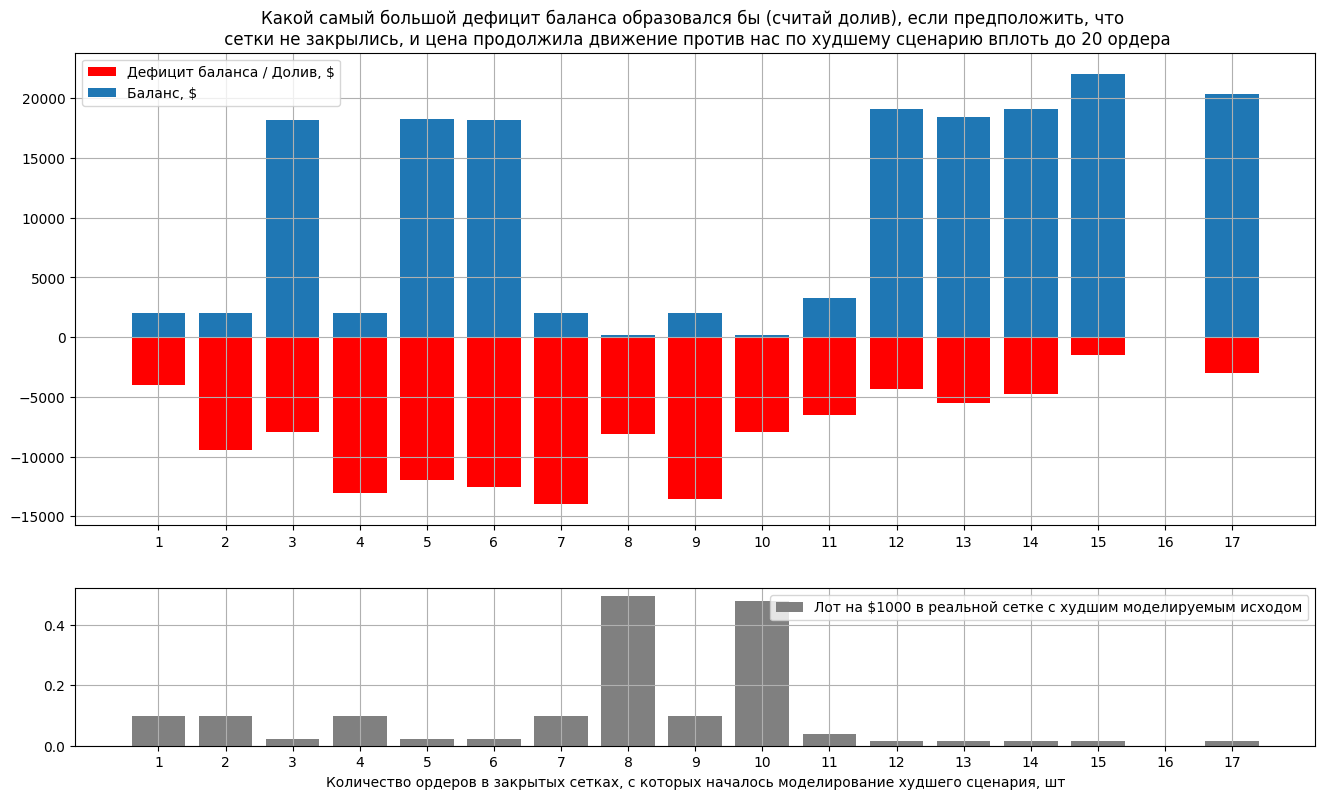

In [229]:
df_grids.sort_values(by=['DK_EQUITY_20'], ascending=True).head(5)

In [ ]:

fig = an.get_worst_equity_20_chart(df_grids=df_grids)
fig.show()

/var/folders/9m/tth9zlt910549vvdqgrwg7rh0000gn/T/ipykernel_43748/1771858014.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


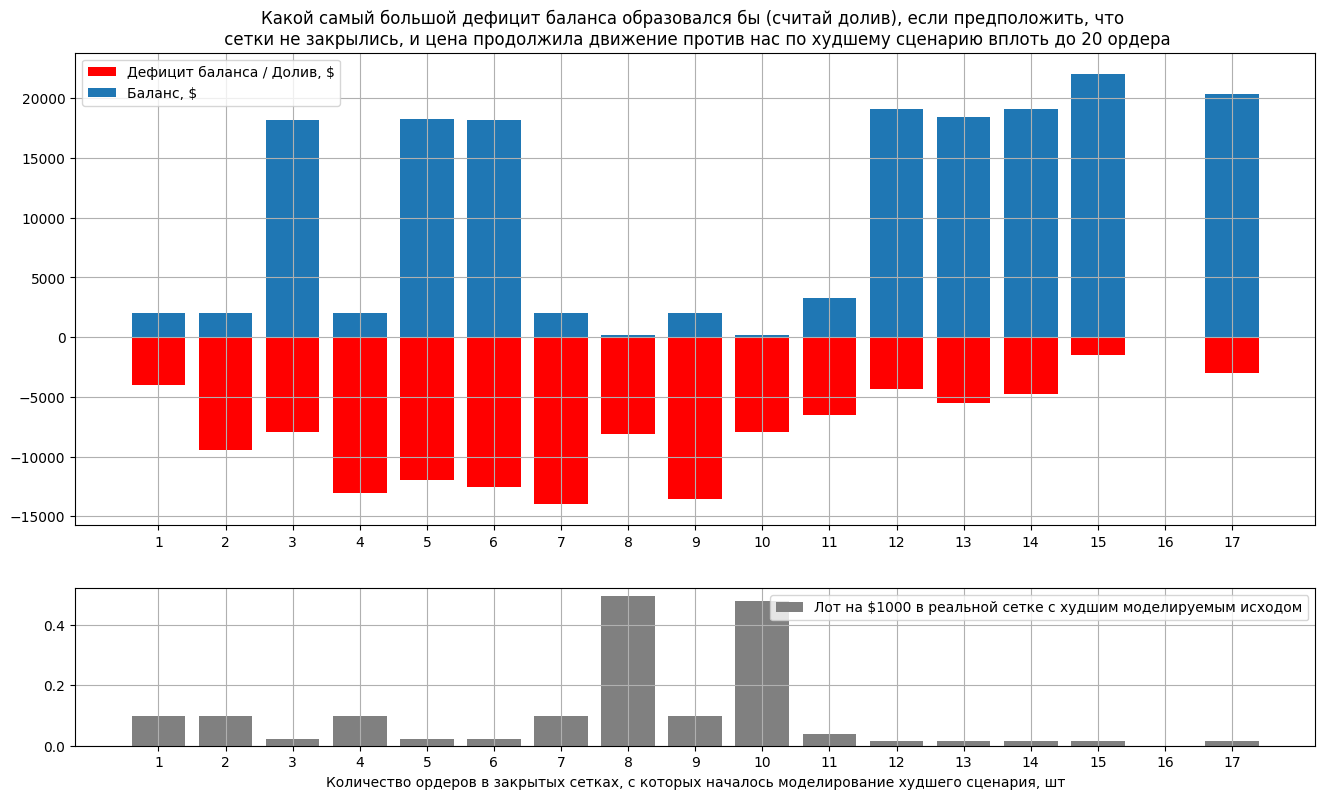